In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, butter

delka vstupniho souboru je 51098 hz
vzorkovaci frekvence je 16000 hz
délka signálu je  3.193625 s
minimum je -0.0758056640625
maximum je 0.105255126953125


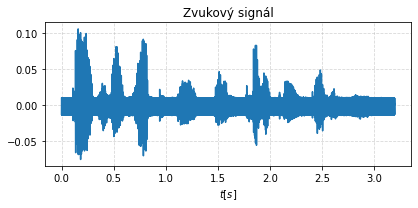

In [2]:
s, fs = sf.read('xkanko00.wav')
size = s.size
print("delka vstupniho souboru je", size, "hz")
print("vzorkovaci frekvence je", fs, "hz")
time = size/fs
print("délka signálu je ", time, "s")
x = s
s = s[:size]
print("minimum je", s.min())
print("maximum je", s.max())
t = np.arange(size) / fs
plt.figure(figsize=(6, 3))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

stredni hodnota je -1.3150545084629046e-05
stredni hodnota je -7.088540877998303e-20


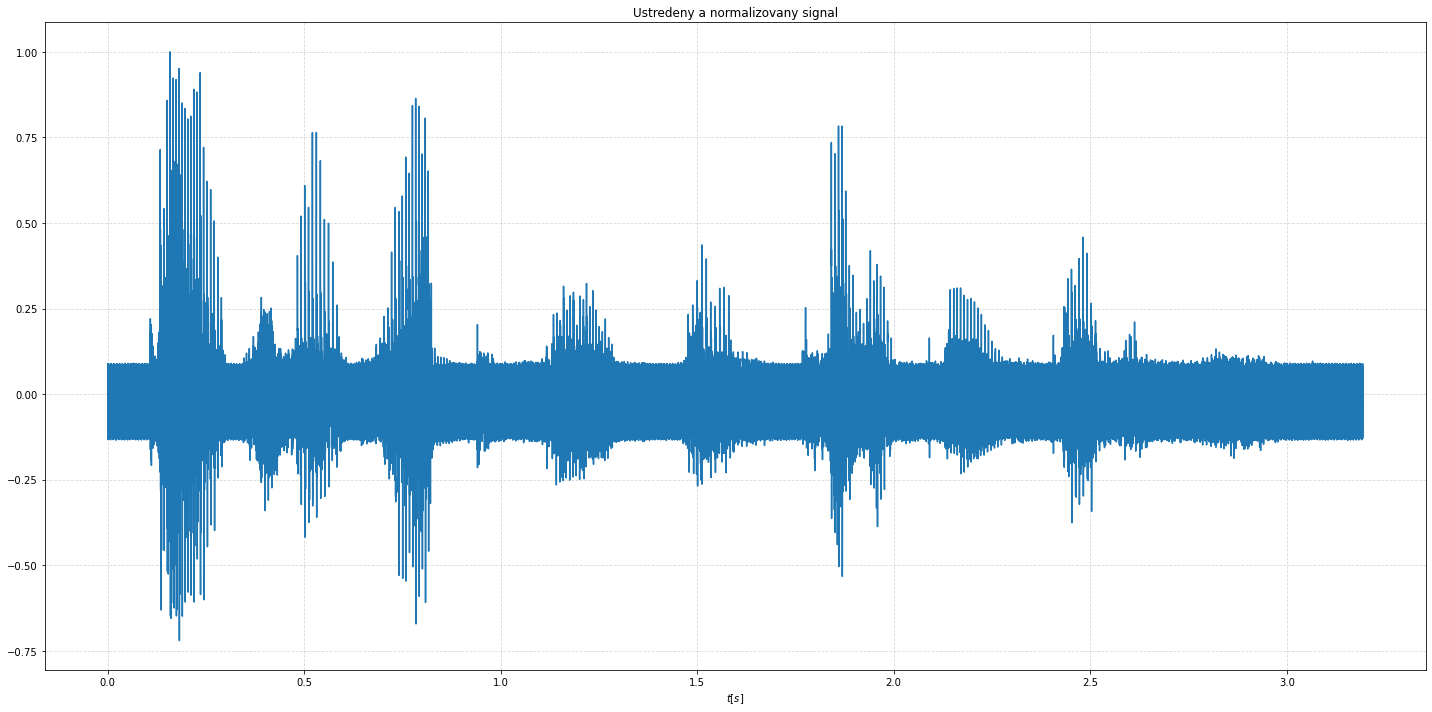

In [3]:
an = np.mean(s)
print("stredni hodnota je", an)
s = s - an
an = np.mean(s)
print("stredni hodnota je", an)
coef = 1 / s.max()
s = s * coef
t = np.arange(s.size) / fs
plt.figure(figsize=(20, 10))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Ustredeny a normalizovany signal')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

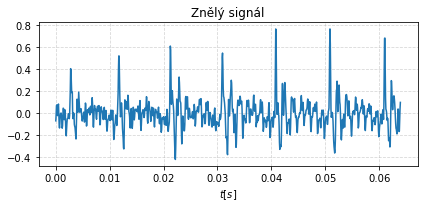

In [4]:
shift = 512
frame_len = 1024
x = np.array([s[i*shift:i*shift + frame_len] for i in range(len(s) //shift - frame_len//shift + 1)])
t = np.arange(len(x[0])) / fs
plt.figure(figsize=(6, 3))
plt.plot(t, x[15])
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Znělý signál')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

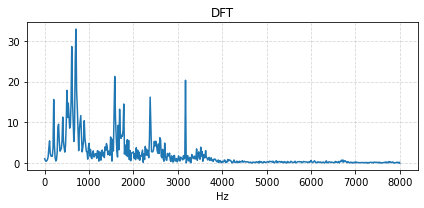

In [5]:
z = x[15]
N = z.shape[0]
n = np.arange(N)
k = n.reshape((N, 1))
M = np.exp(-2j * np.pi * k * n / N)
dftx = np.dot(M, z)
r = np.abs(dftx)[:1024//2+1]
plt.figure(figsize=(6, 3))
f_axis = np.arange(513)
plt.plot(f_axis/1024*fs, r)
plt.gca().set_xlabel('Hz')
plt.gca().set_title('DFT')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

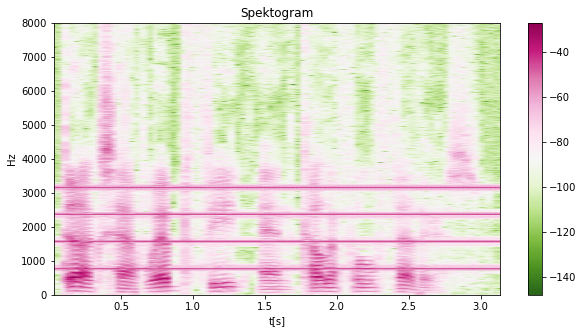

In [17]:
f, t, sgr = spectrogram(s, fs, nperseg=1024, noverlap=512)
sgr_log = 10 * np.log10(sgr)
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, sgr_log, shading="gouraud", cmap='PiYG_r')
plt.title("Spektogram")
plt.colorbar()
plt.ylabel("Hz")
plt.xlabel("t[s]")
plt.show()

In [18]:
f1 = 795
f2 = 1590
f3 = 2385
f4 = 3180
noise = [0] * 4
noise[0] = 795
noise[1] = 1590
noise[2] = 2385
noise[3] = 3180
print("1. frekvence je ", f1, "Hz")
print("2. frekvence je ", f2, "Hz")
print("3. frekvence je ", f3, "Hz")
print("4. frekvence je ", f4, "Hz")

1. frekvence je  795 Hz
2. frekvence je  1590 Hz
3. frekvence je  2385 Hz
4. frekvence je  3180 Hz


In [8]:
arr = np.arange(size)/fs
out_cos1 = np.cos(2 * np.pi * f1 * arr)
out_cos2 = np.cos(2 * np.pi * f2 * arr)
out_cos3 = np.cos(2 * np.pi * f3 * arr)
out_cos4 = np.cos(2 * np.pi * f4 * arr)
out = out_cos1+out_cos2+out_cos3+out_cos4
sf.write('audio/4cos.wav', out, fs)

Koeficienty 1 filtru jsou a [  1.          -5.63631655  13.51172391 -17.61278228  13.16253803
  -5.34876476   0.92446058] b [  0.96148873  -5.49112896  13.33787253 -17.61560567  13.33787253
  -5.49112896   0.96148873]

Koeficienty 2 filtru jsou a [  1.          -4.80512334  10.61852566 -13.47046087  10.34411434
  -4.5599771    0.92446058] b [  0.96148873  -4.68134671  10.48206156 -13.47286789  10.48206156
  -4.68134671   0.96148873]

Koeficienty 3 filtru jsou a [ 1.         -3.50938461  7.02707578 -8.43739039  6.84548531 -3.33034395
  0.92446058] b [ 0.96148873 -3.41898531  6.9370221  -8.43914834  6.9370221  -3.41898531
  0.96148873]

Koeficienty 4 filtru jsou a [ 1.         -1.87436866  4.09265114 -3.89518962  3.98690073 -1.77874272
  0.92446058] b [ 0.96148873 -1.82608622  4.0405175  -3.89612855  4.0405175  -1.82608622
  0.96148873]



Text(0.5, 1.0, 'inpulsni odezva 4. filtru')

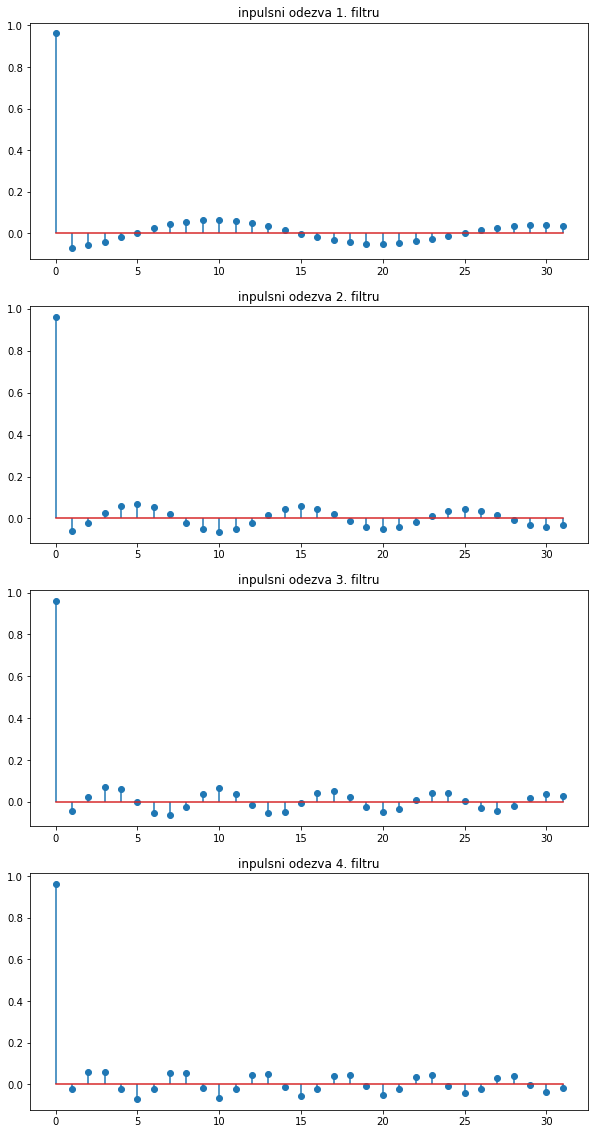

In [24]:
b_s = []
a_s = []
for i in range(4):
    lowcut = noise[i]-50
    highcut = noise[i]+50
    order = 3
    nyq = 0.5 *fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    
    print("Koeficienty", i+1, "filtru jsou", "a",  a, "b",  b)
    print("")
    
    b_s.append(b)
    a_s.append(a)
h = []
for j in range(4):
    N_imp = 32
    imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
    h.append(lfilter(b_s[j], a_s[j], imp))
_, ax = plt.subplots(4, 1, figsize=(10,20))
ax[0].stem(h[0])
ax[0].set_title('inpulsni odezva 1. filtru')

ax[1].stem(h[1])
ax[1].set_title('inpulsni odezva 2. filtru')

ax[2].stem(h[2])
ax[2].set_title('inpulsni odezva 3. filtru')

ax[3].stem(h[3])
ax[3].set_title('inpulsni odezva 4. filtru')

Text(0.5, 1.0, 'Nuly a poly 4. filtru')

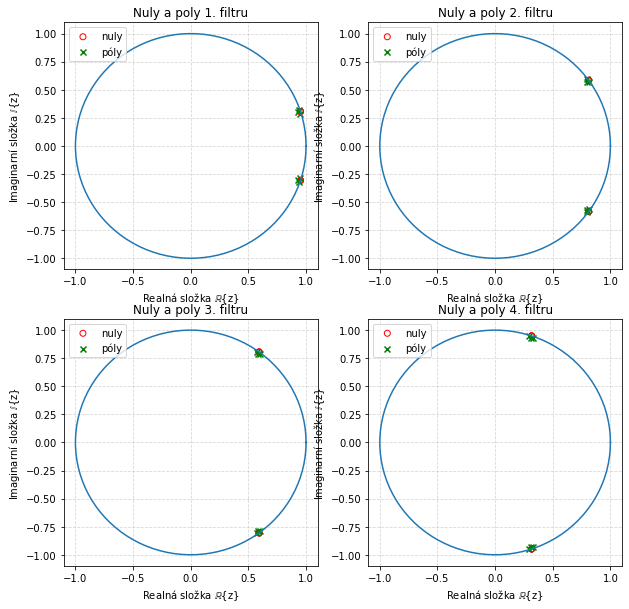

In [10]:
_, ax = plt.subplots(2, 2, figsize=(10,10))
ang = np.linspace(0, 2*np.pi,100)
z, p, k = tf2zpk(b_s[0], a_s[0])
ax[0, 0].plot(np.cos(ang), np.sin(ang))
ax[0, 0].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[0, 0].scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

ax[0, 0].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[0, 0].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[0, 0].grid(alpha=0.5, linestyle='--')
ax[0, 0].legend(loc='upper left')
ax[0, 0].set_title("Nuly a poly 1. filtru")

z, p, k = tf2zpk(b_s[1], a_s[1])
ax[0, 1].plot(np.cos(ang), np.sin(ang))
ax[0, 1].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[0, 1].scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

ax[0, 1].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[0, 1].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[0, 1].grid(alpha=0.5, linestyle='--')
ax[0, 1].legend(loc='upper left')
ax[0, 1].set_title("Nuly a poly 2. filtru")

z, p, k = tf2zpk(b_s[2], a_s[2])
ax[1, 0].plot(np.cos(ang), np.sin(ang))
ax[1, 0].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[1, 0].scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

ax[1, 0].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[1, 0].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[1, 0].grid(alpha=0.5, linestyle='--')
ax[1, 0].legend(loc='upper left')
ax[1, 0].set_title("Nuly a poly 3. filtru")

z, p, k = tf2zpk(b_s[3], a_s[3])
ax[1, 1].plot(np.cos(ang), np.sin(ang))
ax[1, 1].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[1, 1].scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

ax[1, 1].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[1, 1].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[1, 1].grid(alpha=0.5, linestyle='--')
ax[1, 1].legend(loc='upper left')
ax[1, 1].set_title("Nuly a poly 4. filtru")

Text(0.5, 1.0, 'Argument frekvenční charakteristiky $\\mathrm{arg}\\ H(e^{j\\omega})$ 4. filtru')

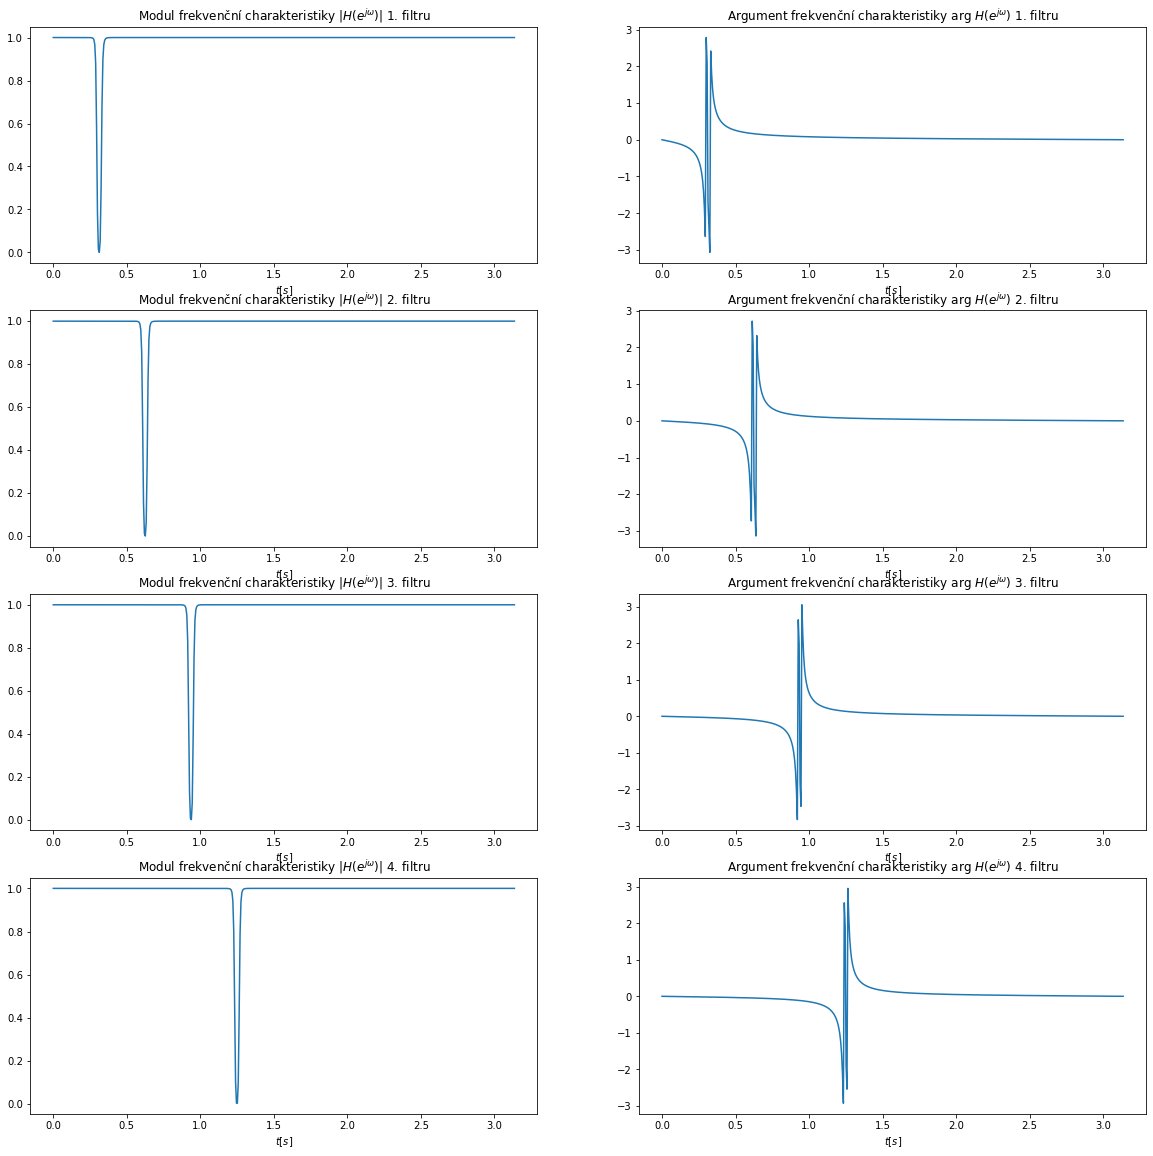

In [28]:
_, ax = plt.subplots(4, 2, figsize=(20,20))
w, H = freqz(b_s[0], a_s[0])
ax[0, 0].plot(w, np.abs(H))
ax[0, 0].set_xlabel('$t[s]$')
ax[0, 0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ 1. filtru')

ax[0, 1].plot(w, np.angle(H))
ax[0, 1].set_xlabel('$t[s]$')
ax[0, 1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ 1. filtru')

w, H = freqz(b_s[1], a_s[1])
ax[1, 0].plot(w, np.abs(H))
ax[1, 0].set_xlabel('$t[s]$')
ax[1, 0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ 2. filtru')

ax[1, 1].plot(w, np.angle(H))
ax[1, 1].set_xlabel('$t[s]$')
ax[1, 1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ 2. filtru')

w, H = freqz(b_s[2], a_s[2])
ax[2, 0].plot(w, np.abs(H))
ax[2, 0].set_xlabel('$t[s]$')
ax[2, 0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ 3. filtru')

ax[2, 1].plot(w, np.angle(H))
ax[2, 1].set_xlabel('$t[s]$')
ax[2, 1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ 3. filtru')

w, H = freqz(b_s[3], a_s[3])
ax[3, 0].plot(w, np.abs(H))
ax[3, 0].set_xlabel('$t[s]$')
ax[3, 0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ 4. filtru')

ax[3, 1].plot(w, np.angle(H))
ax[3, 1].set_xlabel('$t[s]$')
ax[3, 1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ 4. filtru')

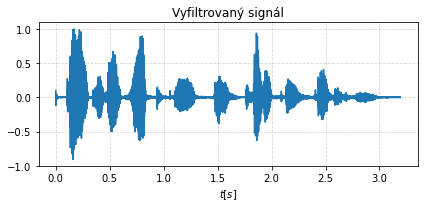

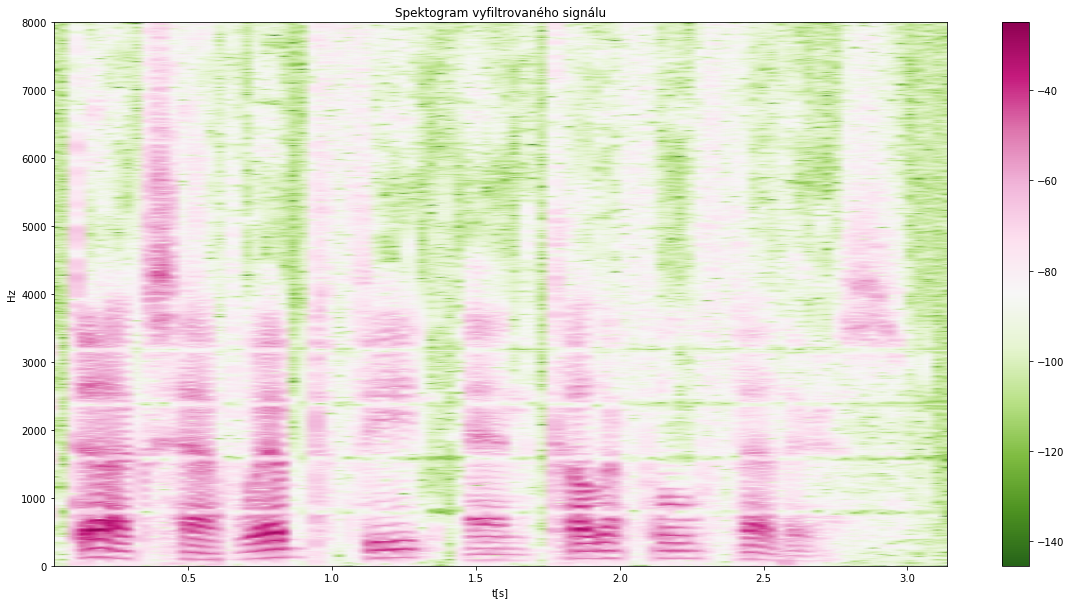

In [30]:
filtred = s
for i in range(4):
    filtred = lfilter(b_s[i], a_s[i], filtred)
    
coef = 1 / filtred.max()
filtred = filtred * coef

plt.figure(figsize=(6, 3))
t = np.arange(size)/fs
plt.plot(t, filtred)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Vyfiltrovaný signál')
plt.gca().grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

f, t, sgr = spectrogram(filtred, fs, nperseg=1024, noverlap=512)
sgr_log = 10 * np.log10(sgr)
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, sgr_log, shading="gouraud", cmap='PiYG_r')
plt.title("Spektogram vyfiltrovaného signálu")
plt.colorbar()
plt.ylabel("Hz")
plt.xlabel("t[s]")
plt.show()

sf.write('audio/clean_bandstop.wav', filtred, fs)